In [10]:
import rospy as rp
from std_msgs.msg import String
import jupyros as jr
import rosbag
from cv_bridge import CvBridge, CvBridgeError
import cv2
import numpy as np
import matplotlib

In [11]:

def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

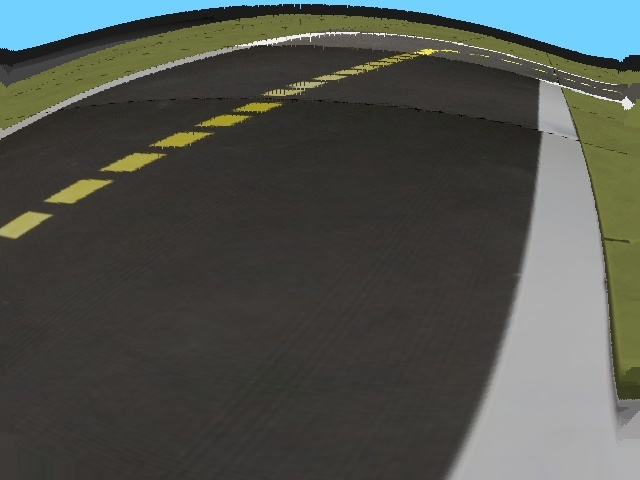

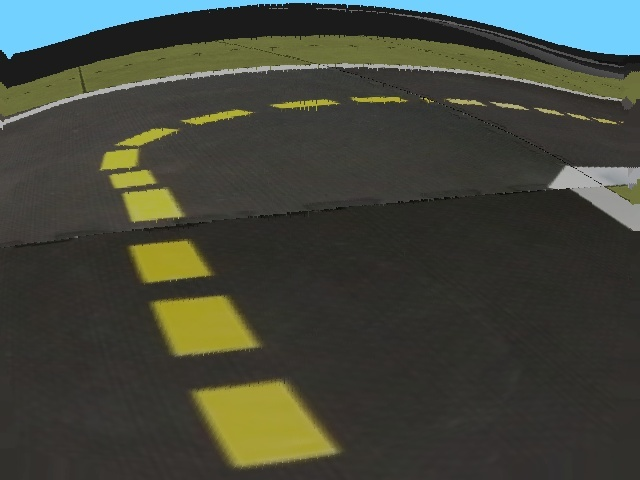

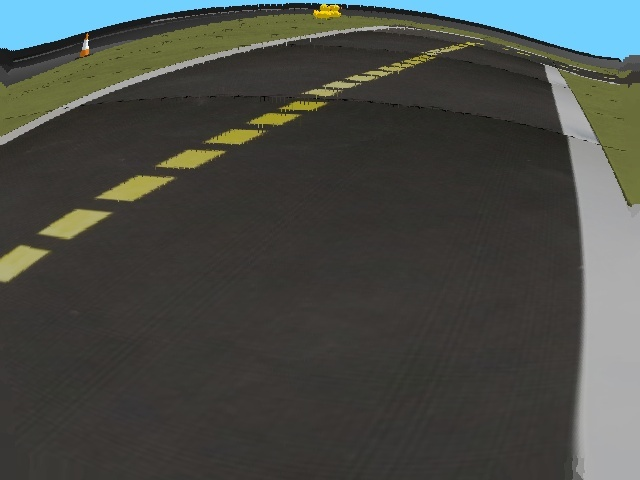

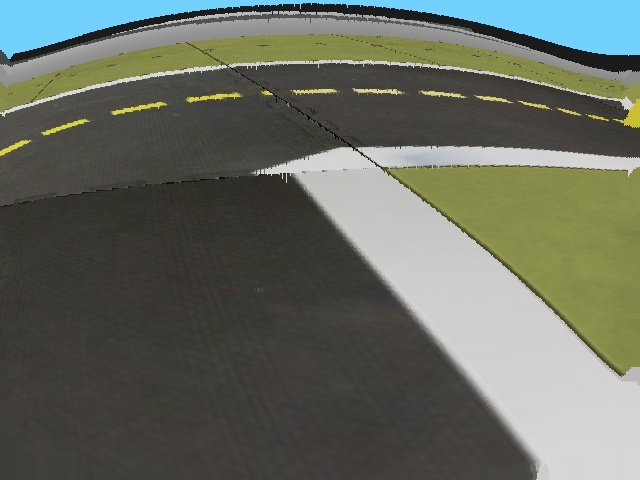

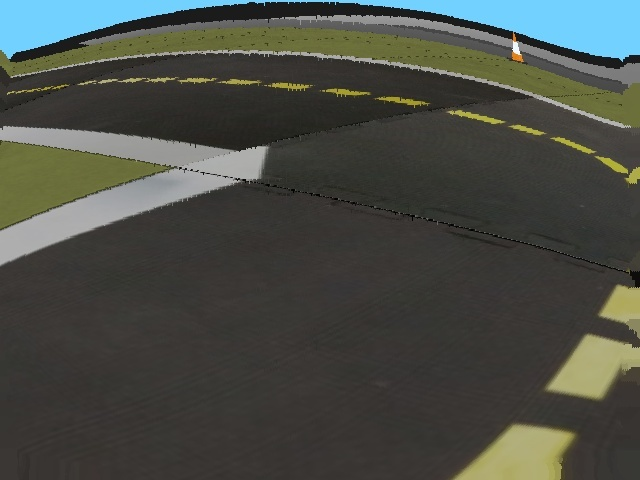

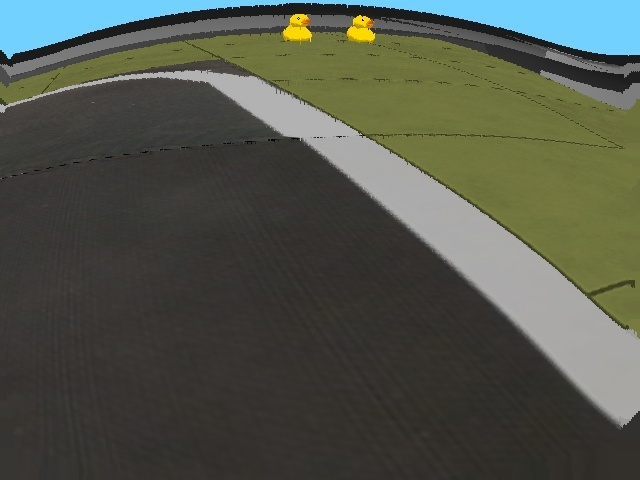

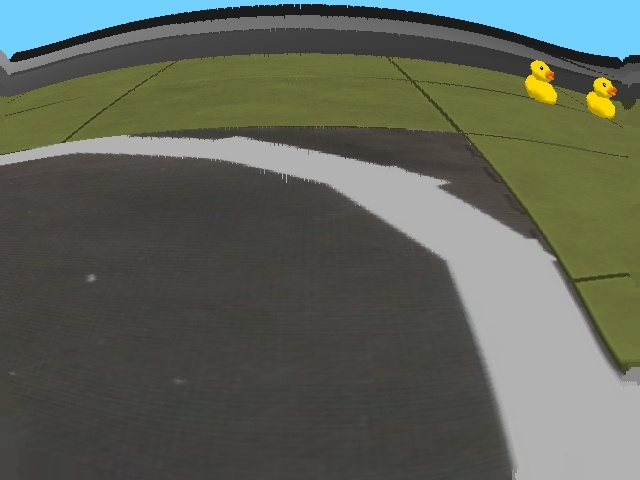

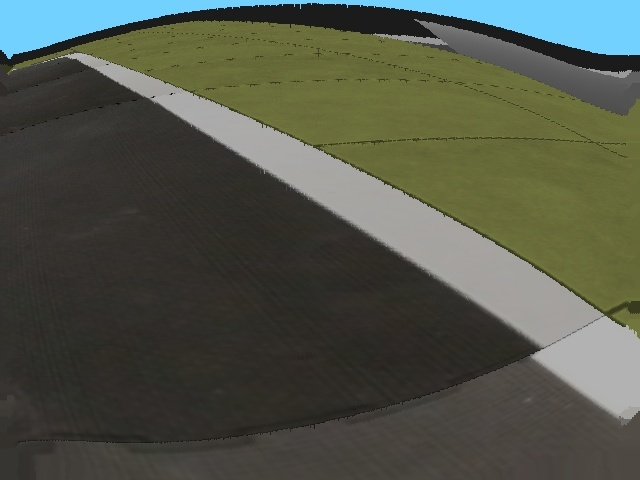

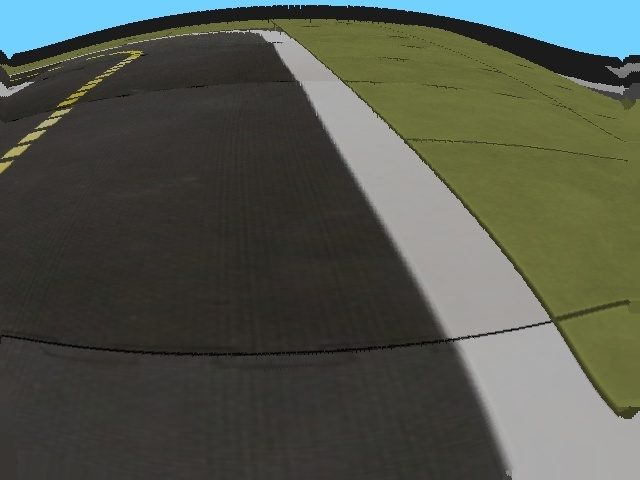

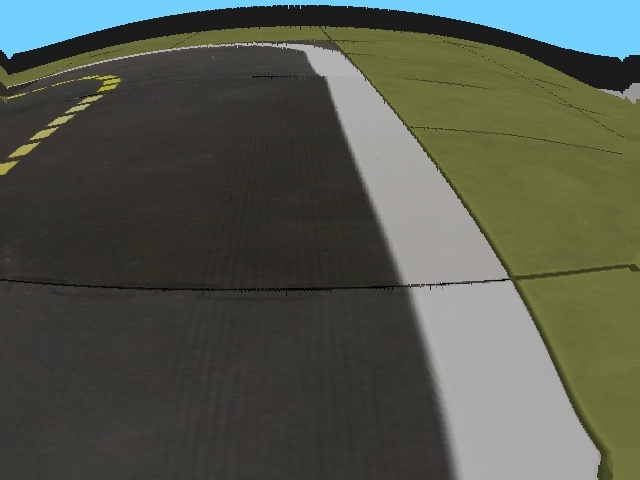

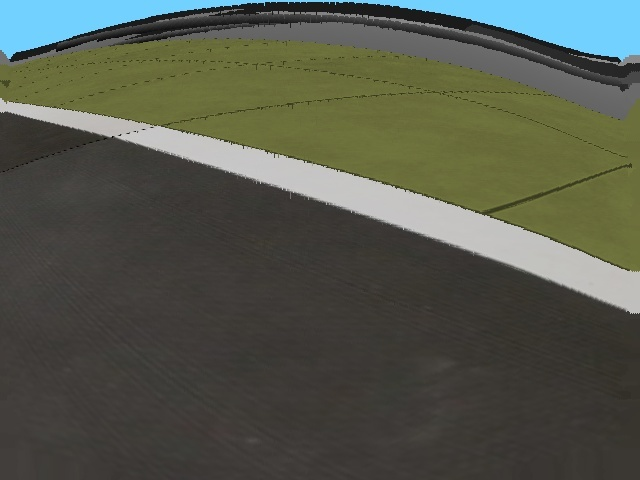

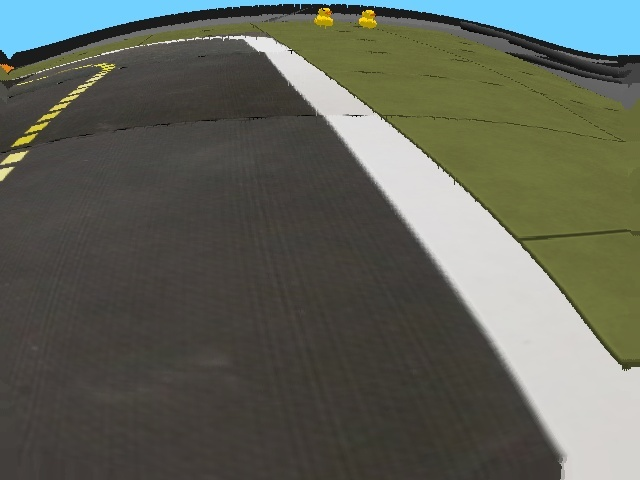

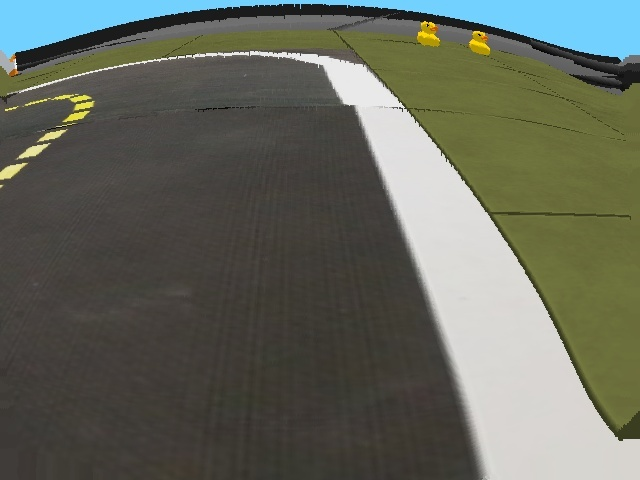

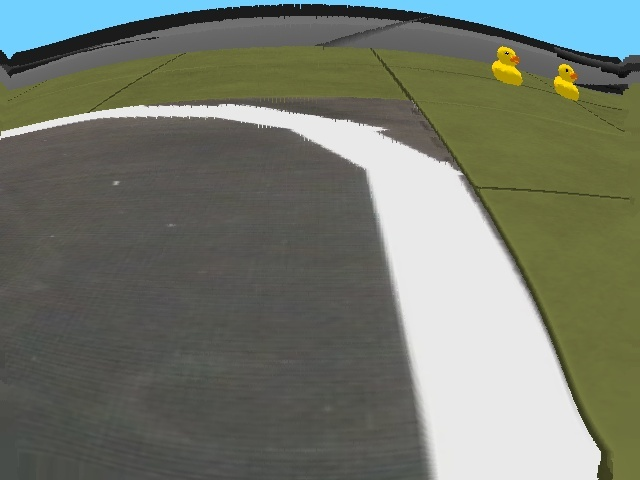

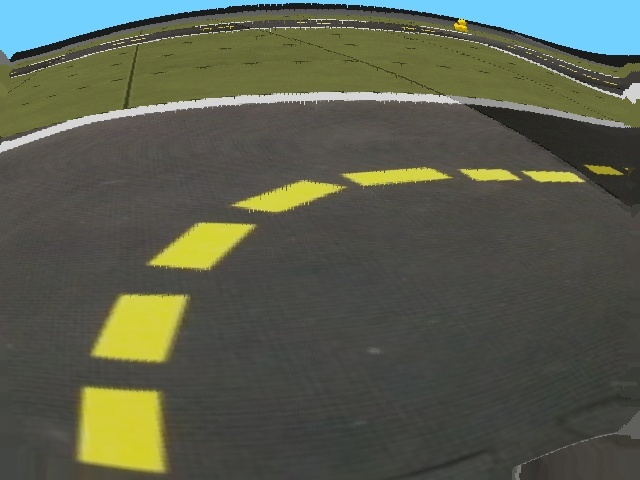

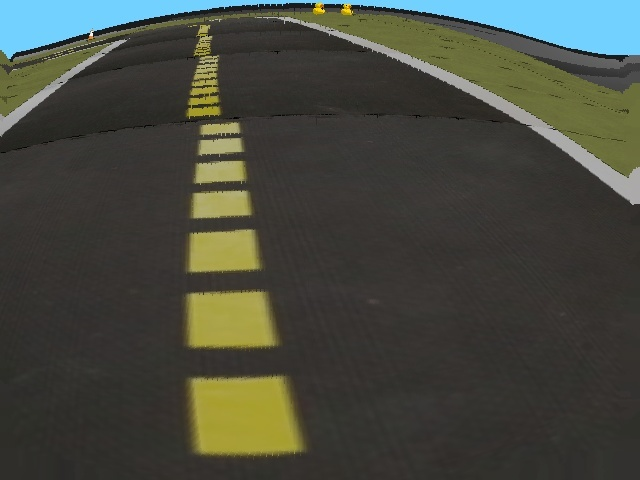

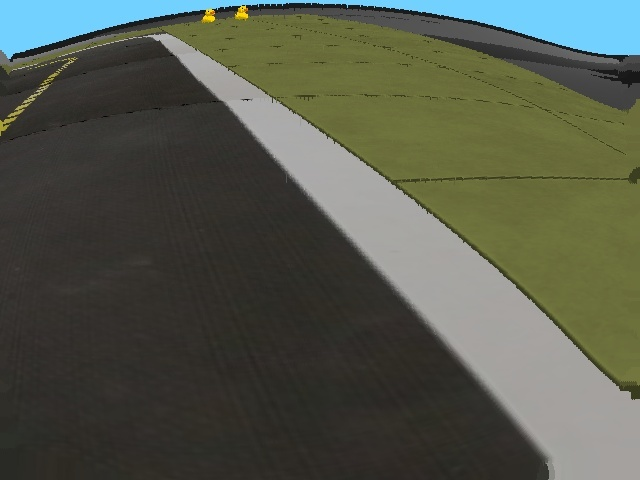

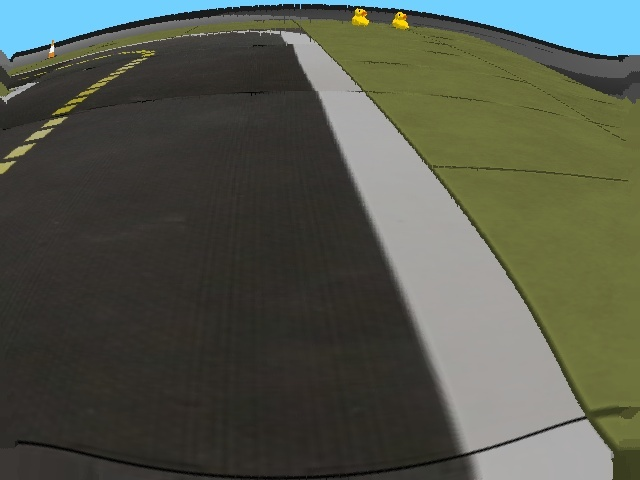

In [17]:
bag = rosbag.Bag('subset_2019-09-14-20-22-34.bag')
for frame_indx, currrent_frame in enumerate(bag.read_messages()):
     # save image every 5
    if frame_indx%5==0:
        message = np.frombuffer(currrent_frame._asdict()['message'].data, np.uint8)
        image_np = cv2.imdecode(message, 1)
        cv2.imwrite("output_images/frame_{}.png".format(frame_indx), image_np)
        if frame_indx%50==0:
            imshow(image_np)


In [18]:
import jupyros as jr
from sensor_msgs.msg import CompressedImage 

In [19]:
rp.init_node('runner')


In [20]:
 
from IPython import get_ipython
from IPython.core.magic import register_line_magic, register_cell_magic, register_line_cell_magic
from threading import Thread
import time

@register_cell_magic
def thread_cell(line, cell):
	t = Thread(target=lambda: exec(cell, globals(), locals()))
	t.start()

In [21]:
%%thread_cell
global current_msg
current_msg = None

jr.subscribe('/baseline/corrected_image/compressed', CompressedImage, lambda msg:  globals().update(current_msg=msg))


<IPython.core.display.Javascript object>


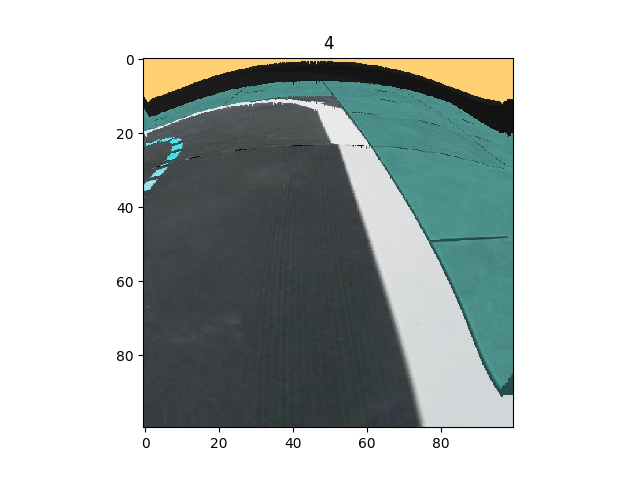

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation

f = plt.figure()
ax = f.gca()

im = np.random.randn(100,100)
image = plt.imshow(im, interpolation='None', animated=True)

def function_for_animation(frame_index=0):
    global current_msg
    msg = current_msg
    message = np.frombuffer(msg.data, np.uint8)
    image_np = cv2.imdecode(message, 1) 
    image.set_data(image_np)
    ax.set_title(str(frame_index))
    return image,

ani = matplotlib.animation.FuncAnimation(f, function_for_animation, interval=200, frames=10, blit=True)